

# Notebook Content
1. Importing Libraries and The Data
1. Data Overview
1. Data Preprocessing
    1. Other Preprocessings
    1. Natural Language Processing
1. Building Model Using Pytorch
1. Fitting Model Using Pytorch
1. Evaulating Results
1. What Did We Do?
1. Conclusion

# Importing Libraries and The Data

In this section I am going to import libraries and the data that I need.

In [ ]:



"""
DATA MANIPULATİNG
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

"""
NATURAL LANGUAGE PROCESSING
"""
import re 
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer

"""
PYTORCH
"""

import torch
import torch.nn as nn


"""
VISUALIZATION TOOLS
"""

import matplotlib.pyplot as plt
import seaborn as sns

"""
TRAIN TEST SPLIT
"""
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
true_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


* the data does not splitted as train and test. It splitted as true and false, so I'll split them into train and test, but before this I'll concatenate them.

In [ ]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
# Adding labels 
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


* And now  concatenate and shuffle them

In [ ]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [ ]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
3899,Trump's pick for Army secretary drops out: off...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"May 5, 2017",1
12077,OBAMA INSPIRED COP HATE UPDATE: TX Restaurant ...,"A Schlotsky s Assistant Manager in Seguin, Tex...",politics,"Dec 22, 2016",0
20259,U.S. lawmakers want 'supercharged' response to...,WASHINGTON (Reuters) - Frustrated U.S. lawmake...,worldnews,"September 12, 2017",1
2192,Texas 'bathroom bills' stall in special legisl...,"AUSTIN, Texas (Reuters) - Texas measures to re...",politicsNews,"August 14, 2017",1
6909,Ted Cruz’s Daughter Reveals A Shocking Family...,Ted Cruz got a brutal lesson in why he should ...,News,"April 14, 2016",0
17750,Many Nigerians displaced by Boko Haram fightin...,ABUJA (Reuters) - The vast majority of almost ...,worldnews,"October 11, 2017",1
6204,Conservative Heads EXPLODE After Obama Appoin...,President Barack Obama made history when he ap...,News,"May 24, 2016",0
11709,NORDSTROM DISCONTINUES Ivanka Trump Brand Afte...,When Nordstrom announced on Thursday that it w...,politics,"Feb 8, 2017",0
1266,Facebook will help investigators release Russi...,WASHINGTON (Reuters) - Facebook Inc (FB.O) Chi...,politicsNews,"October 11, 2017",1
17097,Will Your Hometown Be Taking In Obama’s Refuge...,Our friend Ann Corcoran has been exposing the ...,Government News,"Sep 16, 2015",0


* data is ready

# Data Overview

In this section am going to check :

* Is the data unbalanced?
* How many classes in subject feature?


## Is The Data Unbalanced?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


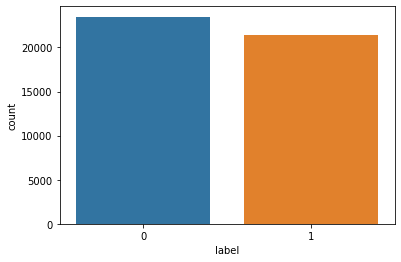

In [ ]:
sns.countplot(data["label"])
plt.show()

* Fake news are a bit more but it does not create a problem. So,the data is balanced.

## How Many Classes In Subject Feature


In [ ]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

* There are 8 type of subjects in the dataset.
* Most of the dataset's label is politicsNews
*  should encode this feature.

# Data Preprocessing

In this section I will prepare the dataset for deep learning. I will follow two main steps:

1. Other Preprocessings
1. Natural Language Processing

## Other Preprocessings

In this main step, I will follow these steps:

1. Subject Feature - One Hot Encoding
1. Dropping Date

In [ ]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3899,Trump's pick for Army secretary drops out: off...,WASHINGTON (Reuters) - U.S. President Donald T...,"May 5, 2017",1,0,0,0,0,0,0,1,0
12077,OBAMA INSPIRED COP HATE UPDATE: TX Restaurant ...,"A Schlotsky s Assistant Manager in Seguin, Tex...","Dec 22, 2016",0,0,0,0,0,0,1,0,0
20259,U.S. lawmakers want 'supercharged' response to...,WASHINGTON (Reuters) - Frustrated U.S. lawmake...,"September 12, 2017",1,0,0,0,0,0,0,0,1
2192,Texas 'bathroom bills' stall in special legisl...,"AUSTIN, Texas (Reuters) - Texas measures to re...","August 14, 2017",1,0,0,0,0,0,0,1,0
6909,Ted Cruz’s Daughter Reveals A Shocking Family...,Ted Cruz got a brutal lesson in why he should ...,"April 14, 2016",0,0,0,1,0,0,0,0,0


In [ ]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 3899 to 19437
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 2.7+ MB


## Natural Language Processing
Finally we came our most important step, natural language processing. In this step, I will process text and label features. I will start with the text

In [ ]:
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()

for txt in data.text:
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_text.append(txt)
    
    
new_text[0]
    

'washington reuters u s president donald trump s nominee for army secretary mark green withdrew his name from consideration for the position a white house official said on friday green who is the third trump nominee for a service secretary position to withdraw ha faced criticism from right group and lawmaker over allegation about past comment regarding minority a well a lesbian gay bisexual and transgender or lgbt people in a statement green said false and misleading attack had driven him to withdraw tragically my life of public service and my christian belief have been mischaracterized and attacked by a few on the other side of the aisle for political gain he said while these false attack have no bearing on the need of the army or my qualification to serve i believe it is critical to give the president the ability to move forward with his vision to restore our military to it rightful place in the world u s senate democratic leader chuck schumer said in a statement that green s decisio

In [ ]:
new_title = []
for txt in data.title:
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_title.append(txt)
new_title[0]


'trump s pick for army secretary drop out official'

* And now I am going to create sparce matrixes.


In [ ]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray() 
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


* And now let's concatenate everything.

In [ ]:
data.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3899,Trump's pick for Army secretary drops out: off...,WASHINGTON (Reuters) - U.S. President Donald T...,1,0,0,0,0,0,0,1,0
12077,OBAMA INSPIRED COP HATE UPDATE: TX Restaurant ...,"A Schlotsky s Assistant Manager in Seguin, Tex...",0,0,0,0,0,0,1,0,0
20259,U.S. lawmakers want 'supercharged' response to...,WASHINGTON (Reuters) - Frustrated U.S. lawmake...,1,0,0,0,0,0,0,0,1
2192,Texas 'bathroom bills' stall in special legisl...,"AUSTIN, Texas (Reuters) - Texas measures to re...",1,0,0,0,0,0,0,1,0
6909,Ted Cruz’s Daughter Reveals A Shocking Family...,Ted Cruz got a brutal lesson in why he should ...,0,0,0,1,0,0,0,0,0


In [ ]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 3899 to 19437
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.0 MB


In [ ]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [ ]:
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)



*  checking the shapes, after that I am going to split X and Y into train and test.

In [ ]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [ ]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


# Building Model Using Pytorch

the data is ready, now am going to build an ANN model using pytorch. I'll use ReLU as activation function, Adam as optimizer and Cross Entropy as Loss.

In [ ]:
class ANN(nn.Module):
    
    def __init__(self):
        
        super(ANN,self).__init__() # Inhertiting
        
        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1
        
        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT 
        
    
    def forward(self,x):
        
        out = self.linear1(x) # Input Layer 
        out = self.relu1(out)
        
        out = self.linear2(out) # Hidden Layer 1 
        out = self.relu2(out)
        
        out = self.linear3(out) # Hidden Layer 2 
        out = self.relu3(out)
        
        out = self.linear4(out) # Hidden Layer 3 
        out = self.relu4(out)

        
        out = self.linear5(out) # Output Layer
        
        return out
    

model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

* the model have built, now the training

# Fitting Model Using Pytorch

And in this stage, I will fit the model using our prepared data. I will use a for loop in order to train.

In [ ]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in range(EPOCHS):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward Propagation
    outs = model(X_train)
    
    # Computing Loss
    loss = error(outs,Y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")
    
    

Loss after iteration 0 is 0.6929566860198975
Loss after iteration 1 is 1.0821880102157593
Loss after iteration 2 is 0.7602689266204834
Loss after iteration 3 is 0.9926819205284119
Loss after iteration 4 is 0.6630052328109741
Loss after iteration 5 is 0.7018396854400635
Loss after iteration 6 is 0.39557912945747375
Loss after iteration 7 is 0.3872334361076355
Loss after iteration 8 is 0.2761445939540863
Loss after iteration 9 is 0.144939124584198
Loss after iteration 10 is 0.17745254933834076
Loss after iteration 11 is 0.12962934374809265
Loss after iteration 12 is 0.08651061356067657
Loss after iteration 13 is 0.08014033734798431
Loss after iteration 14 is 0.05121864005923271
Loss after iteration 15 is 0.03525891900062561
Loss after iteration 16 is 0.0346093624830246
Loss after iteration 17 is 0.030623186379671097
Loss after iteration 18 is 0.021807026118040085
Loss after iteration 19 is 0.018387721851468086


# Evaulating Results

The model is trained. Now I am going to predict X_test and after that I will evaulate the results.

In [ ]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))


tensor([0.2445, 3.4254], grad_fn=<SelectBackward0>)
tensor(1)
Model accuracy is  0.9896659242761693


 Our score is %98.9. Let's check the confusion matrix

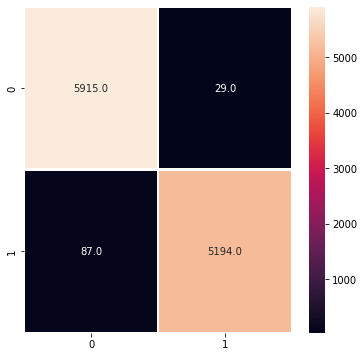

In [ ]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()

# Recap:



1. imported  data and libraries
2. process the data using nlp methods.
3.created  sparce matrixes
4.created X and Y
5. created test and train arrays.
6. built a 4 Layer Model using Pytorch
7.trained the model that i've built
8. made predictions and evaulate them.
